In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [82]:
df = pd.read_csv("../dataset/shopping_trends.csv")
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


In [83]:
df.drop(columns=["Customer ID"], inplace=True)

In [84]:
df.describe()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000
mean,44.068462,59.764359,3.749949,25.351538
std,15.207589,23.685392,0.716223,14.447125
min,18.000000,20.000000,2.500000,1.000000
25%,31.000000,39.000000,3.100000,13.000000
50%,44.000000,60.000000,3.700000,25.000000
75%,57.000000,81.000000,4.400000,38.000000
max,70.000000,100.000000,5.000000,50.000000


In [85]:
df.isnull().sum()

Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       3900 non-null   int64  
 1   Gender                    3900 non-null   object 
 2   Item Purchased            3900 non-null   object 
 3   Category                  3900 non-null   object 
 4   Purchase Amount (USD)     3900 non-null   int64  
 5   Location                  3900 non-null   object 
 6   Size                      3900 non-null   object 
 7   Color                     3900 non-null   object 
 8   Season                    3900 non-null   object 
 9   Review Rating             3900 non-null   float64
 10  Subscription Status       3900 non-null   object 
 11  Payment Method            3900 non-null   object 
 12  Shipping Type             3900 non-null   object 
 13  Discount Applied          3900 non-null   object 
 14  Promo Co

In [87]:
# Selecting numerical features
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_data = df[numerical_features]
print(numerical_data)

      Age  Purchase Amount (USD)  Review Rating  Previous Purchases
0      55                     53            3.1                  14
1      19                     64            3.1                   2
2      50                     73            3.1                  23
3      21                     90            3.5                  49
4      45                     49            2.7                  31
...   ...                    ...            ...                 ...
3895   40                     28            4.2                  32
3896   52                     49            4.5                  41
3897   46                     33            2.9                  24
3898   44                     77            3.8                  24
3899   52                     81            3.1                  33

[3900 rows x 4 columns]


In [88]:
# Standardize the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(numerical_data)
scaled_df = pd.DataFrame(scaled_df, columns=numerical_data.columns)

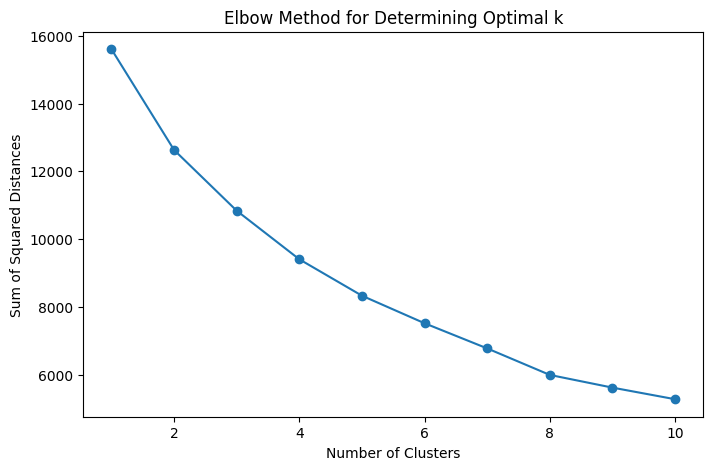

In [89]:
sse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Determining Optimal k')
plt.show()

In [90]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_df)
scaled_df['Cluster'] = kmeans.labels_
labels = scaled_df['Cluster']

In [91]:
df_analysis = scaled_df.groupby(["Cluster"]).mean()
df_analysis

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
Cluster,,,,
0,0.428208,0.763183,0.890836,0.538267
1,-0.589664,-0.872469,0.748761,-0.429598
2,-1.011341,0.798454,-0.460621,-0.281740
3,0.261569,-0.633832,-0.698643,0.919993
4,0.852493,0.002855,-0.609195,-0.875694


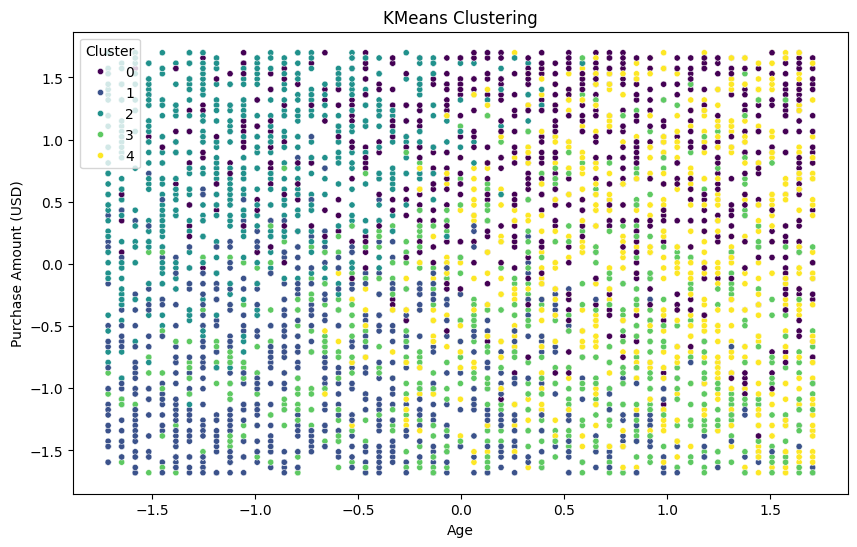

Cluster centroids:
        Age  Purchase Amount (USD)  Review Rating  Previous Purchases
0  0.430304               0.763833       0.890649            0.537862
1 -0.591550              -0.870889       0.749980           -0.426490
2 -1.011341               0.798454      -0.460621           -0.281740
3  0.261569              -0.633832      -0.698643            0.919993
4  0.851600               0.001436      -0.608276           -0.876697


In [92]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_df.iloc[:, 0], y=scaled_df.iloc[:, 1],
                hue=scaled_df['Cluster'], palette='viridis', marker='o', s=20)
plt.title('KMeans Clustering')
plt.xlabel(numerical_features[0])
plt.ylabel(numerical_features[1])
plt.show()

# Centroids
centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns=numerical_features)
print("Cluster centroids:")
print(centroids_df)

Interpretation of Clusters

Cluster 0: High-Spending, High-Rated Regulars

Characteristics: Customers in this segment are relatively young and tend to spend more money per purchase. They give high review ratings and have a moderate number of previous purchases.

Cluster 1: Low-Spending, Satisfied Infrequent Buyers
Characteristics: These customers are on the younger side and tend to make smaller purchases. They give good reviews but don't buy often.

Cluster 2: Older, High-Spending Occasional Buyers
Characteristics: This segment comprises older customers who make significant purchases but provide lower review ratings and purchase less frequently.

Cluster 3: Moderate-Spending Frequent Buyers
Characteristics: Customers here have a moderate age and spending level but are highly frequent purchasers with lower satisfaction.

Cluster 4: Young, Moderate-Spending, Low-Engagement
Characteristics: These young customers have average spending and engagement levels, but their review ratings are lower.